In [ ]:
#Bayesian-Network
pip install pgmpy

In [ ]:
import numpy as np
import csv
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
heartDisease = pd.read_csv('/content/heart.csv')
heartDisease = heartDisease.replace('?', np.nan)

In [ ]:

heartDisease['age'] = pd.cut(heartDisease['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100],
                             labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

In [ ]:
print('Few examples from the dataset are given below')
print(heartDisease.head())

Few examples from the dataset are given below
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  50-60    1   3     145   233    1        0       150     0      2.3    0   
1  30-40    1   2     130   250    0        1       187     0      3.5    0   
2  40-50    0   1     130   204    0        0       172     0      1.4    2   
3  50-60    1   1     120   236    0        1       178     0      0.8    2   
4  50-60    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [ ]:

model = BayesianNetwork([('age', 'trtbps'), ('age', 'fbs'),
                         ('sex', 'trtbps'), ('exng', 'trtbps'),
                         ('trtbps', 'output'), ('fbs', 'output'),
                         ('output', 'restecg'), ('output', 'thalachh'),
                         ('output', 'chol')])

In [ ]:
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

print('\n1. Probability of Heart Disease given Age=30-40')
q = HeartDisease_infer.query(variables=['output'], evidence={'age': '30-40'})
print(q.values[0])


Learning CPD using Maximum likelihood estimators

Inferencing with Bayesian Network:

1. Probability of Heart Disease given Age=30-40
0.3337773276637473


In [ ]:
print("\nUnique values of 'chol':")
print(heartDisease['chol'].unique())


Unique values of 'chol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311]


In [ ]:
print('\n2. Probability of Heart Disease given cholesterol=233')
q = HeartDisease_infer.query(variables=['output'], evidence={'chol': 233})
print(q.values[0])


2. Probability of Heart Disease given cholesterol=233
0.2438207302344458


In [ ]:
edges = [('age', 'trtbps'), ('age', 'fbs'), ('sex', 'trtbps'), ('exng', 'trtbps'),
         ('trtbps', 'output'), ('fbs', 'output'), ('output', 'restecg'),
         ('output', 'thalachh'), ('output', 'chol')]

In [ ]:
G = nx.DiGraph()


G.add_edges_from(edges)

In [ ]:

edges = [('age', 'trtbps'), ('age', 'fbs'), ('sex', 'trtbps'), ('exng', 'trtbps'),
         ('trtbps', 'output'), ('fbs', 'output'), ('output', 'restecg'),
         ('output', 'thalachh'), ('output', 'chol')]


G = nx.DiGraph()

G.add_edges_from(edges)

colors = {'age': 'red', 'trtbps': 'blue', 'fbs': 'green', 'sex': 'yellow',
          'exng': 'purple', 'output': 'orange', 'restecg': 'pink',
          'thalachh': 'gray', 'chol': 'cyan'}

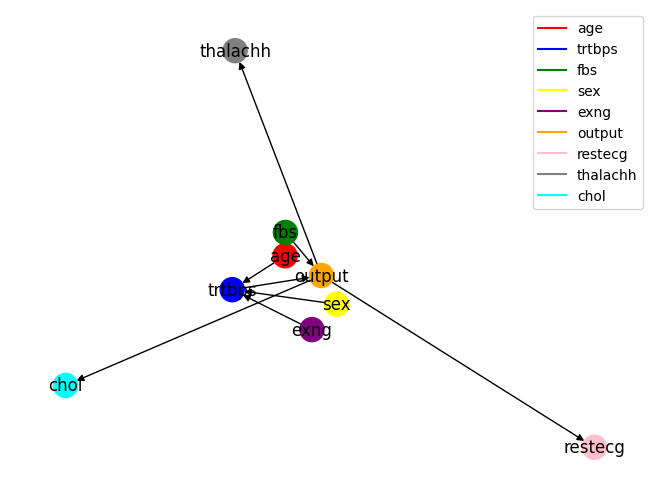

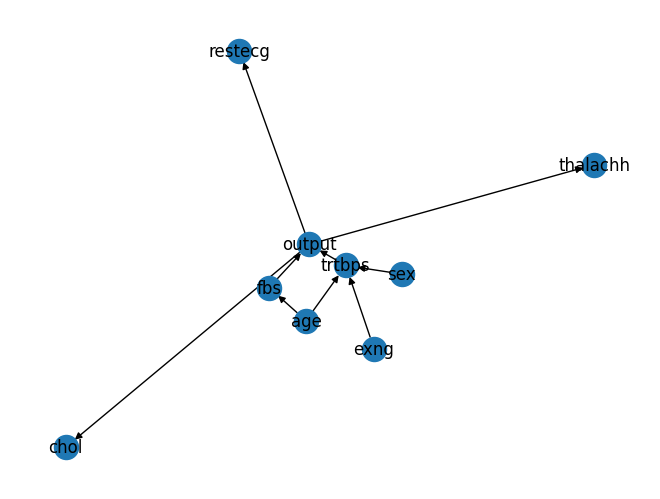

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[colors[node] for node in G.nodes])

for label, color in colors.items():
    plt.plot([0], [0], color=color, label=label)
plt.legend()

plt.show()

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()
